<a href="https://colab.research.google.com/github/tanaymukherjee/Spoken-Language-Processing-in-Python/blob/master/01_Spoken_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spoken Language Processing

## Import necessary libraries and packeges

In [12]:
# Import necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
% matplotlib inline

# Needed imports for audio files
from IPython.display import Audio
from scipy.io import wavfile

## Reading data from Google drive

In [1]:
# Mounting google colab with personal GDrive

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [28]:
# Checking the content in my GDrive witihin the working directory

!ls -ahl "/content/gdrive/My Drive/Colab Notebooks/Data"

total 33M
-rw------- 1 root root  30M Jul 18 04:35 fake_or_real_news.csv
-rw------- 1 root root 653K Jul 21 07:28 good-afternoon.wav
-rw------- 1 root root 489K Jul 21 06:33 good-morning.wav
-rw------- 1 root root 291K May 31 02:02 Index2018.csv
-rw------- 1 root root 164K May 31 02:02 RandWalk.csv
-rw------- 1 root root 492K Jun 16 22:51 spam.csv
-rw------- 1 root root 1.1M Jun 16 03:45 tweets.csv


## Importing an audio file with Python

In [23]:
import wave

# Create audio file wave object
good_morning = wave.open("/content/gdrive/My Drive/Colab Notebooks/Data/good-morning.wav", 'r')

# Read all frames from wave object 
signal_gm = good_morning.readframes(-1)

# View first 10
print(signal_gm[:10])

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


## Bytes to integers

In [25]:
import numpy as np

# Create audio file wave object
good_morning = wave.open("/content/gdrive/My Drive/Colab Notebooks/Data/good-morning.wav", 'r')

signal_gm = good_morning.readframes(-1)

# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values
print(soundwave_gm[:10])

[ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11]


## Finding the time stamps

In [26]:
# Read in sound wave and convert from bytes to integers
good_morning = wave.open("/content/gdrive/My Drive/Colab Notebooks/Data/good-morning.wav", 'r')
signal_gm = good_morning.readframes(-1)
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()

# Find the sound wave timestamps
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm,
                      num=len(soundwave_gm))

# Print the first 10 timestamps
print(time_gm[:10])

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04]


In [29]:
# Read in sound wave and convert from bytes to integers
good_afternoon = wave.open("/content/gdrive/My Drive/Colab Notebooks/Data/good-afternoon.wav", 'r')
signal_ga = good_afternoon.readframes(-1)
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')

# Get the sound wave frame rate
framerate_ga = good_afternoon.getframerate()

# Find the sound wave timestamps
time_ga = np.linspace(start=0,
                      stop=len(soundwave_ga)/framerate_ga,
                      num=len(soundwave_ga))

# Print the first 10 timestamps
print(time_gm[:10])

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04]


## Processing audio data with Python

You've seen how a sound waves can be turned into numbers but what does all that conversion look like?

And how about another similar sound wave? One slightly different?

In this exercise, we're going to use MatPlotLib to plot the sound wave of good_morning against good_afternoon.

To have the good_morning and good_afternoon sound waves on the same plot and distinguishable from each other, we'll use MatPlotLib's alpha parameter.

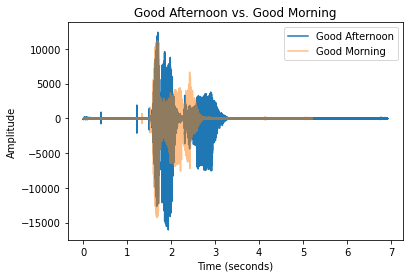

In [32]:
# Setup the title and axis titles
plt.title('Good Afternoon vs. Good Morning')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot
plt.plot(time_gm, soundwave_gm, label='Good Morning',
   # Set the alpha variable to 0.5
   alpha=0.5)

plt.legend()
plt.show()